In [1]:
%load_ext autoreload
%autoreload 2

In [52]:
import pandas as pd
import torch
import os
import matplotlib.pyplot as plt
import cv2
from src.data_loader import CaptchasDataset
from src.network import CaptchaDenseNetwork

In [53]:
# Load dataset.
ground_truth = pd.read_csv("dataset/ground-truth.csv")

captchas_dataset = CaptchasDataset("dataset/images", ground_truth, transpose=False, label_as_str=True)

### Visualize raw dataset

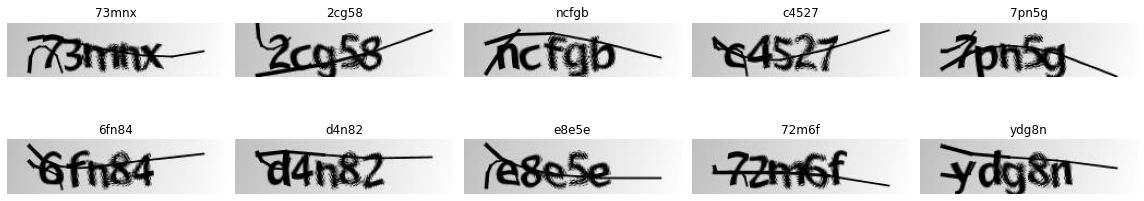

In [54]:
images_to_show = captchas_dataset[0:10]

figure, ax = plt.subplots(nrows=2, ncols=5, figsize=(16, 4))
for i, (image, label) in enumerate(images_to_show):
    ax.ravel()[i].imshow(image)
    ax.ravel()[i].set_title(label)
    ax.ravel()[i].set_axis_off()
plt.tight_layout()
plt.show()

### Load and test model

In [57]:
# Load trained parameters.
model_trained = CaptchaDenseNetwork()
state_dict = torch.load("saved_model/trained_model.pt")
model_trained.load_state_dict(state_dict)
model_trained.eval()

CaptchaDenseNetwork(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=8448, out_features=1024, bias=True)
  (fc2_0): Linear(in_features=1024, out_features=100, bias=True)
  (fc2_1): Linear(in_features=1024, out_features=100, bias=True)
  (fc2_2): Linear(in_features=1024, out_features=100, bias=True)
  (fc2_3): Linear(in_features=1024, out_features=100, bias=True)
  (fc2_4): Linear(in_features=1024, out_features=100, bias=True)
)

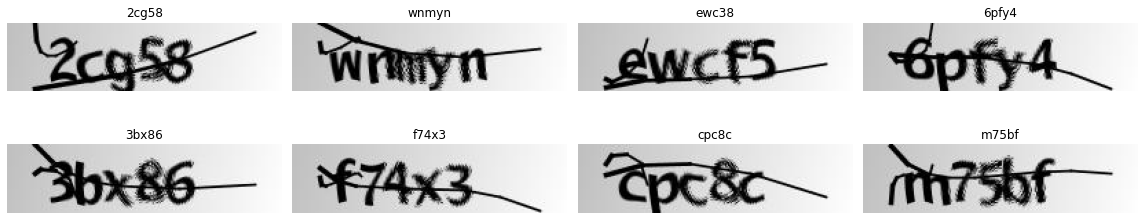

In [58]:
test_images_path = "dataset/test"

figure, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 4))
for i, file in enumerate(os.listdir(test_images_path)):
    image_path = os.path.join(test_images_path, file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_tensor = image.transpose((2, 0, 1))
    image_tensor = torch.from_numpy(image_tensor)
    output = model_trained(image_tensor.unsqueeze(0).float())
    predicted_label = ""
    for y in output:
        _, predicted = torch.max(y, 1)
        predicted_label += captchas_dataset.index_to_label[predicted.item()]
    ax.ravel()[i].imshow(image)
    ax.ravel()[i].set_title(predicted_label)
    ax.ravel()[i].set_axis_off()
plt.tight_layout()
plt.show()